<a href="https://colab.research.google.com/github/Manishareddy54/K_means_Clustering/blob/main/K_means_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('Mall_Customers1.csv')

Data Exploration
Here, we examine the dataset structure, check for any missing values, and review basic statistics. This step helps us understand the data and identify any initial preprocessing needs.

In [3]:
# Show dataset info
data.info()
data.describe()

# Check for missing values
data.isnull().sum()

# Display a sample of the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Preprocessing
To prepare the data for clustering, we convert categorical features into numerical format (if necessary) and standardize the dataset to ensure consistent scaling across variables.

In [4]:
# Encode categorical variables (if needed)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Standardize the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Applying K-Means Clustering
We use the K-means algorithm to segment the customers. First, we apply the Elbow Method to determine the optimal number of clusters by examining the sum of squared distances (SSE) for different cluster counts.

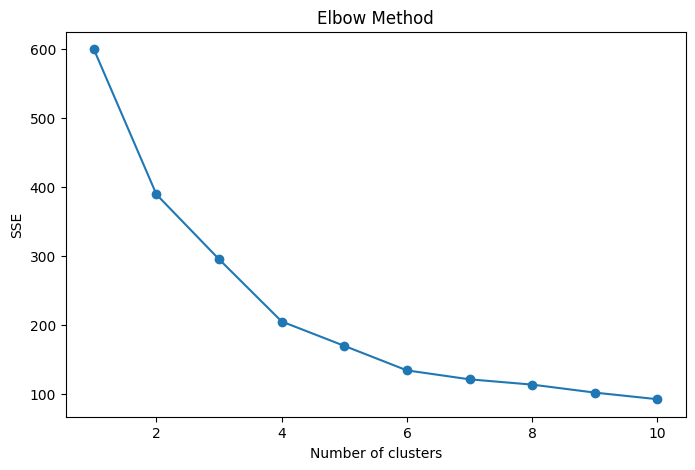

In [5]:
# Finding the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [6]:
# Using the optimal cluster count (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

Visualizing Clusters¶
After applying K-means, we visualize the clusters to interpret customer segments based on spending patterns and income. This visualization allows us to identify high-value customer groups for potential targeted marketing.

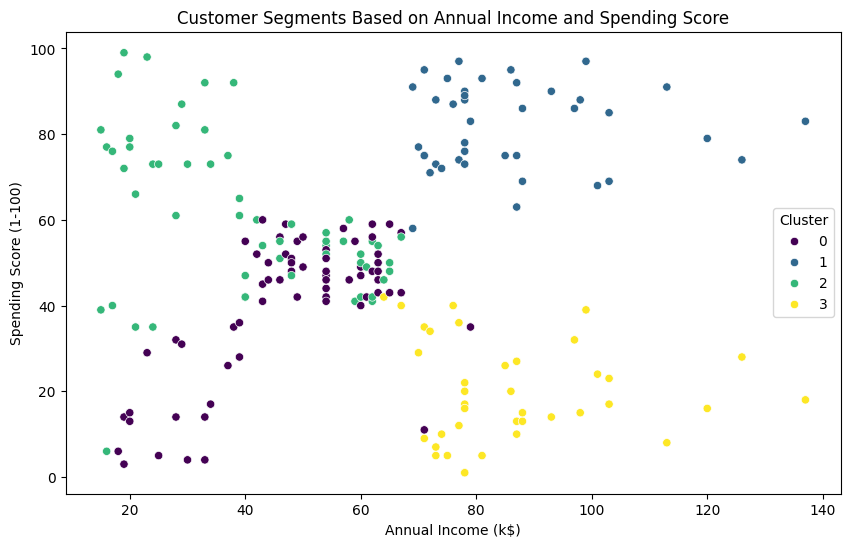

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

Exporting Data for Tableau Visualization¶
To create detailed visualizations in Tableau, we export the data with cluster labels. Tableau provides advanced options for exploring customer segments and identifying trends across different demographic and purchasing factors.

In [8]:
# Save data with clusters
data.to_csv('customer_segments.csv', index=False)

Conclusion¶
Using K-means clustering, we successfully segmented customers into distinct groups based on income and spending. These segments provide actionable insights for targeted marketing, potentially increasing campaign ROI by focusing on high-value customer segments.